In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler

## Importing the data

In [15]:

#PA Metadata
df_train = pd.read_csv("PresenceAbsenceSurveys/GLC24-PA-metadata-train.csv")
df_test = pd.read_csv("PresenceAbsenceSurveys/GLC24-PA-metadata-test.csv")

#Elevation
el_train = pd.read_csv("EnvironmentalRasters/Elevation/GLC24-PA-train-elevation.csv")
el_test = pd.read_csv("EnvironmentalRasters/Elevation/GLC24-PA-test-elevation.csv")

#HumanFootPrint
hf_train = pd.read_csv("EnvironmentalRasters/HumanFootprint/GLC24-PA-train-human-footprint.csv")
hf_test = pd.read_csv("EnvironmentalRasters/HumanFootprint/GLC24-PA-test-human-footprint.csv")

#Landcover
lc_train = pd.read_csv("EnvironmentalRasters/LandCover/GLC24-PA-train-landcover.csv")
lc_test = pd.read_csv("EnvironmentalRasters/LandCover/GLC24-PA-test-landcover.csv")

#Solidgrids
sg_train = pd.read_csv("EnvironmentalRasters/Soilgrids/GLC24-PA-train-soilgrids.csv")
sg_test = pd.read_csv("EnvironmentalRasters/Soilgrids/GLC24-PA-test-soilgrids.csv")



In [16]:
hf_train[np.isinf(hf_train)]

,surveyId,HumanFootprint-Built1994,HumanFootprint-Built2009,HumanFootprint-croplands1992,HumanFootprint-croplands2005,HumanFootprint-Lights1994,HumanFootprint-Lights2009,HumanFootprint-NavWater1994,HumanFootprint-NavWater2009,HumanFootprint-Pasture1993,HumanFootprint-Pasture2009,HumanFootprint-Popdensity1990,HumanFootprint-Popdensity2010,HumanFootprint-Railways,HumanFootprint-Roads,HumanFootprint-HFP1993,HumanFootprint-HFP2009
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
hf_train

,surveyId,HumanFootprint-Built1994,HumanFootprint-Built2009,HumanFootprint-croplands1992,HumanFootprint-croplands2005,HumanFootprint-Lights1994,HumanFootprint-Lights2009,HumanFootprint-NavWater1994,HumanFootprint-NavWater2009,HumanFootprint-Pasture1993,HumanFootprint-Pasture2009,HumanFootprint-Popdensity1990,HumanFootprint-Popdensity2010,HumanFootprint-Railways,HumanFootprint-Roads,HumanFootprint-HFP1993,HumanFootprint-HFP2009
0,212,0.0,0.0,7.0,7.00,6.0,6.0,0.0,0.0,0.0,0.0,6.0,7.0,0.0,0.0,20.0,21.0
1,222,0.0,0.0,3.5,7.00,1.0,1.0,0.0,0.0,0.0,0.0,7.0,7.0,4.0,2.0,10.0,17.0
2,243,0.0,0.0,7.0,0.00,4.0,2.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,15.0,6.0
3,324,0.0,0.0,0.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,9.0,15.0
4,333,0.0,0.0,7.0,7.00,1.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,13.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88982,3919553,0.0,0.0,7.0,7.00,1.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,14.0,13.0
88983,3919592,0.0,0.0,7.0,1.75,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,13.0,6.0
88984,3919620,0.0,0.0,7.0,0.00,2.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,14.0,6.0
88985,3919640,0.0,0.0,7.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,11.0,4.0


In [18]:
df_train.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212


In [19]:
df_train.shape

(1483637, 9)

In [20]:
df_test.shape

(4716, 8)

In [21]:
df_train.isna().sum()

lon                       0
lat                       0
year                      0
geoUncertaintyInM     12496
areaInM2             183272
region                    0
country                   0
speciesId                 0
surveyId                  0
dtype: int64

In [22]:
df_train.drop('region', axis=1, inplace= True)
df_test.drop('region', axis=1, inplace= True)

In [23]:
df_train.drop('country', axis=1, inplace= True)
df_test.drop('country', axis=1, inplace= True)

In [24]:
geouncertainityInM_mean =df_train['geoUncertaintyInM'].mean()
areaInM2_mean = df_train['areaInM2'].mean()

In [25]:
df_train['geoUncertaintyInM'].replace(np.nan,geouncertainityInM_mean,inplace = True)
df_train['areaInM2'].replace(np.nan, areaInM2_mean, inplace= True)

In [26]:
df_test.isna().sum()

lon                    0
lat                    0
year                   0
geoUncertaintyInM     39
areaInM2             553
surveyId               0
dtype: int64

In [27]:
geouncertainityInM_mean_test =df_test['geoUncertaintyInM'].mean()
areaInM2_mean_test = df_test['areaInM2'].mean()

In [28]:
df_test['geoUncertaintyInM'].replace(np.nan,geouncertainityInM_mean_test,inplace = True)
df_test['areaInM2'].replace(np.nan, areaInM2_mean_test, inplace= True)

In [29]:
el_train.shape

(88987, 2)

In [30]:
df_train.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,4530.0,212


In [31]:
print(df_train.shape)
for dataset in [el_train, hf_train, lc_train, sg_train]:
    df_train = pd.merge(df_train, dataset, how = "left", left_on = "surveyId", right_on = "surveyId")
    print(df_train.shape)
    del dataset
    
print(df_test.shape)
for dataset in [el_test, hf_test, lc_test, sg_test]:
    df_test = pd.merge(df_test, dataset, how = "left", left_on = "surveyId", right_on = "surveyId")
    print(df_test.shape)
    del dataset    

(1483637, 7)
(1483637, 8)
(1483637, 24)
(1483637, 25)
(1483637, 34)
(4716, 6)
(4716, 7)
(4716, 23)
(4716, 24)
(4716, 33)


In [33]:
df_train.isna().sum()

lon                                   0
lat                                   0
year                                  0
geoUncertaintyInM                     0
areaInM2                              0
speciesId                             0
surveyId                              0
HumanFootprint-Built1994              0
HumanFootprint-Built2009              0
HumanFootprint-croplands1992          0
HumanFootprint-croplands2005          0
HumanFootprint-Lights1994             0
HumanFootprint-Lights2009             0
HumanFootprint-NavWater1994       80707
HumanFootprint-NavWater2009       80707
HumanFootprint-Pasture1993            0
HumanFootprint-Pasture2009            0
HumanFootprint-Popdensity1990         0
HumanFootprint-Popdensity2010         0
HumanFootprint-Railways               0
HumanFootprint-Roads              80707
HumanFootprint-HFP1993            80707
HumanFootprint-HFP2009            80707
LandCover                             0
Soilgrid-bdod                    124244


In [32]:
# Since theres not enough data (only about 4k samples) about the elevation as compared to the total number of samples (1483637),
# we can drop the elevation column from our training dataset and test dataset 
df_train.drop('Elevation', axis = 1,inplace=True)
df_test.drop('Elevation', axis = 1,inplace=True)

In [34]:
#Dealing with the Missing Values by replacing them with the mean in the training data

df_train['Soilgrid-bdod'].replace(np.nan,df_train['Soilgrid-bdod'].mean(),inplace=True)
df_train['Soilgrid-cec'].replace(np.nan,df_train['Soilgrid-cec'].mean(),inplace=True)
df_train['Soilgrid-cfvo'].replace(np.nan,df_train['Soilgrid-cfvo'].mean(),inplace=True)
df_train['Soilgrid-clay'].replace(np.nan,df_train['Soilgrid-clay'].mean(),inplace=True)
df_train['Soilgrid-nitrogen'].replace(np.nan,df_train['Soilgrid-nitrogen'].mean(),inplace=True)
df_train['Soilgrid-phh2o'].replace(np.nan,df_train['Soilgrid-phh2o'].mean(),inplace=True)
df_train['Soilgrid-sand'].replace(np.nan,df_train['Soilgrid-sand'].mean(),inplace=True)
df_train['Soilgrid-silt'].replace(np.nan,df_train['Soilgrid-silt'].mean(),inplace=True)
df_train['Soilgrid-soc'].replace(np.nan,df_train['Soilgrid-soc'].mean(),inplace=True)
df_train['HumanFootprint-NavWater1994'].replace(np.nan,df_train['HumanFootprint-NavWater1994'].mean(),inplace=True)
df_train['HumanFootprint-NavWater2009'].replace(np.nan,df_train['HumanFootprint-NavWater2009'].mean(),inplace=True)
df_train['HumanFootprint-Roads'].replace(np.nan,df_train['HumanFootprint-Roads'].mean(),inplace=True)
df_train['HumanFootprint-HFP1993'].replace(np.nan,df_train['HumanFootprint-HFP1993'].mean(),inplace=True)
df_train['HumanFootprint-HFP2009'].replace(np.nan,df_train['HumanFootprint-HFP2009'].mean(),inplace=True)

In [151]:
df_train.isna().sum()

lon                                0
lat                                0
year                               0
geoUncertaintyInM                  0
areaInM2                           0
speciesId                          0
surveyId                           0
Elevation                        477
HumanFootprint-Built1994           0
HumanFootprint-Built2009           0
HumanFootprint-croplands1992       0
HumanFootprint-croplands2005       0
HumanFootprint-Lights1994          0
HumanFootprint-Lights2009          0
HumanFootprint-NavWater1994        0
HumanFootprint-NavWater2009        0
HumanFootprint-Pasture1993         0
HumanFootprint-Pasture2009         0
HumanFootprint-Popdensity1990      0
HumanFootprint-Popdensity2010      0
HumanFootprint-Railways            0
HumanFootprint-Roads               0
HumanFootprint-HFP1993             0
HumanFootprint-HFP2009             0
LandCover                          0
Soilgrid-bdod                      0
Soilgrid-cec                       0
S

In [36]:
#Dealing with the Missing Values by replacing them with the mean in the testing data

df_test['Soilgrid-bdod'].replace(np.nan,df_test['Soilgrid-bdod'].mean(),inplace=True)
df_test['Soilgrid-cec'].replace(np.nan,df_test['Soilgrid-cec'].mean(),inplace=True)
df_test['Soilgrid-cfvo'].replace(np.nan,df_test['Soilgrid-cfvo'].mean(),inplace=True)
df_test['Soilgrid-clay'].replace(np.nan,df_test['Soilgrid-clay'].mean(),inplace=True)
df_test['Soilgrid-nitrogen'].replace(np.nan,df_test['Soilgrid-nitrogen'].mean(),inplace=True)
df_test['Soilgrid-phh2o'].replace(np.nan,df_test['Soilgrid-phh2o'].mean(),inplace=True)
df_test['Soilgrid-sand'].replace(np.nan,df_test['Soilgrid-sand'].mean(),inplace=True)
df_test['Soilgrid-silt'].replace(np.nan,df_test['Soilgrid-silt'].mean(),inplace=True)
df_test['Soilgrid-soc'].replace(np.nan,df_test['Soilgrid-soc'].mean(),inplace=True)
df_test['HumanFootprint-NavWater1994'].replace(np.nan,df_test['HumanFootprint-NavWater1994'].mean(),inplace=True)
df_test['HumanFootprint-NavWater2009'].replace(np.nan,df_test['HumanFootprint-NavWater2009'].mean(),inplace=True)
df_test['HumanFootprint-Roads'].replace(np.nan,df_test['HumanFootprint-Roads'].mean(),inplace=True)
df_test['HumanFootprint-HFP1993'].replace(np.nan,df_test['HumanFootprint-HFP1993'].mean(),inplace=True)
df_test['HumanFootprint-HFP2009'].replace(np.nan,df_test['HumanFootprint-HFP2009'].mean(),inplace=True)

In [37]:
df_test.isna().sum()

lon                              0
lat                              0
year                             0
geoUncertaintyInM                0
areaInM2                         0
surveyId                         0
HumanFootprint-Built1994         0
HumanFootprint-Built2009         0
HumanFootprint-croplands1992     0
HumanFootprint-croplands2005     0
HumanFootprint-Lights1994        0
HumanFootprint-Lights2009        0
HumanFootprint-NavWater1994      0
HumanFootprint-NavWater2009      0
HumanFootprint-Pasture1993       0
HumanFootprint-Pasture2009       0
HumanFootprint-Popdensity1990    0
HumanFootprint-Popdensity2010    0
HumanFootprint-Railways          0
HumanFootprint-Roads             0
HumanFootprint-HFP1993           0
HumanFootprint-HFP2009           0
LandCover                        0
Soilgrid-bdod                    0
Soilgrid-cec                     0
Soilgrid-cfvo                    0
Soilgrid-clay                    0
Soilgrid-nitrogen                0
Soilgrid-phh2o      

In [52]:
df_train.head(10)

,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId,surveyId,HumanFootprint-Built1994,HumanFootprint-Built2009,HumanFootprint-croplands1992,...,LandCover,Soilgrid-bdod,Soilgrid-cec,Soilgrid-cfvo,Soilgrid-clay,Soilgrid-nitrogen,Soilgrid-phh2o,Soilgrid-sand,Soilgrid-silt,Soilgrid-soc
0,3.099038,43.134956,2021,5.0,100.0,6874.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
1,3.099038,43.134956,2021,5.0,100.0,476.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
2,3.099038,43.134956,2021,5.0,100.0,11157.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
3,3.099038,43.134956,2021,5.0,100.0,8784.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
4,3.099038,43.134956,2021,5.0,100.0,4530.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
5,3.099038,43.134956,2021,5.0,100.0,10520.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
6,3.099038,43.134956,2021,5.0,100.0,9458.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
7,3.099038,43.134956,2021,5.0,100.0,982.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
8,3.099038,43.134956,2021,5.0,100.0,51.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
9,3.099038,43.134956,2021,5.0,100.0,3935.0,212,0.0,0.0,7.0,...,8.0,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0


In [153]:
#Eliminate the infinite values
df_train = df_train.replace([np.inf, -np.inf], np.nan).dropna()
df_train.shape
df_train = df_train.astype('float32')
# Split the data into training and testing data
X = df_train.drop(["speciesId"],axis=1)
y = df_train["speciesId"].values.reshape(len(X),1)

X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=42)

In [124]:
#df_test = df_test.replace([np.inf, -np.inf], np.nan).dropna()

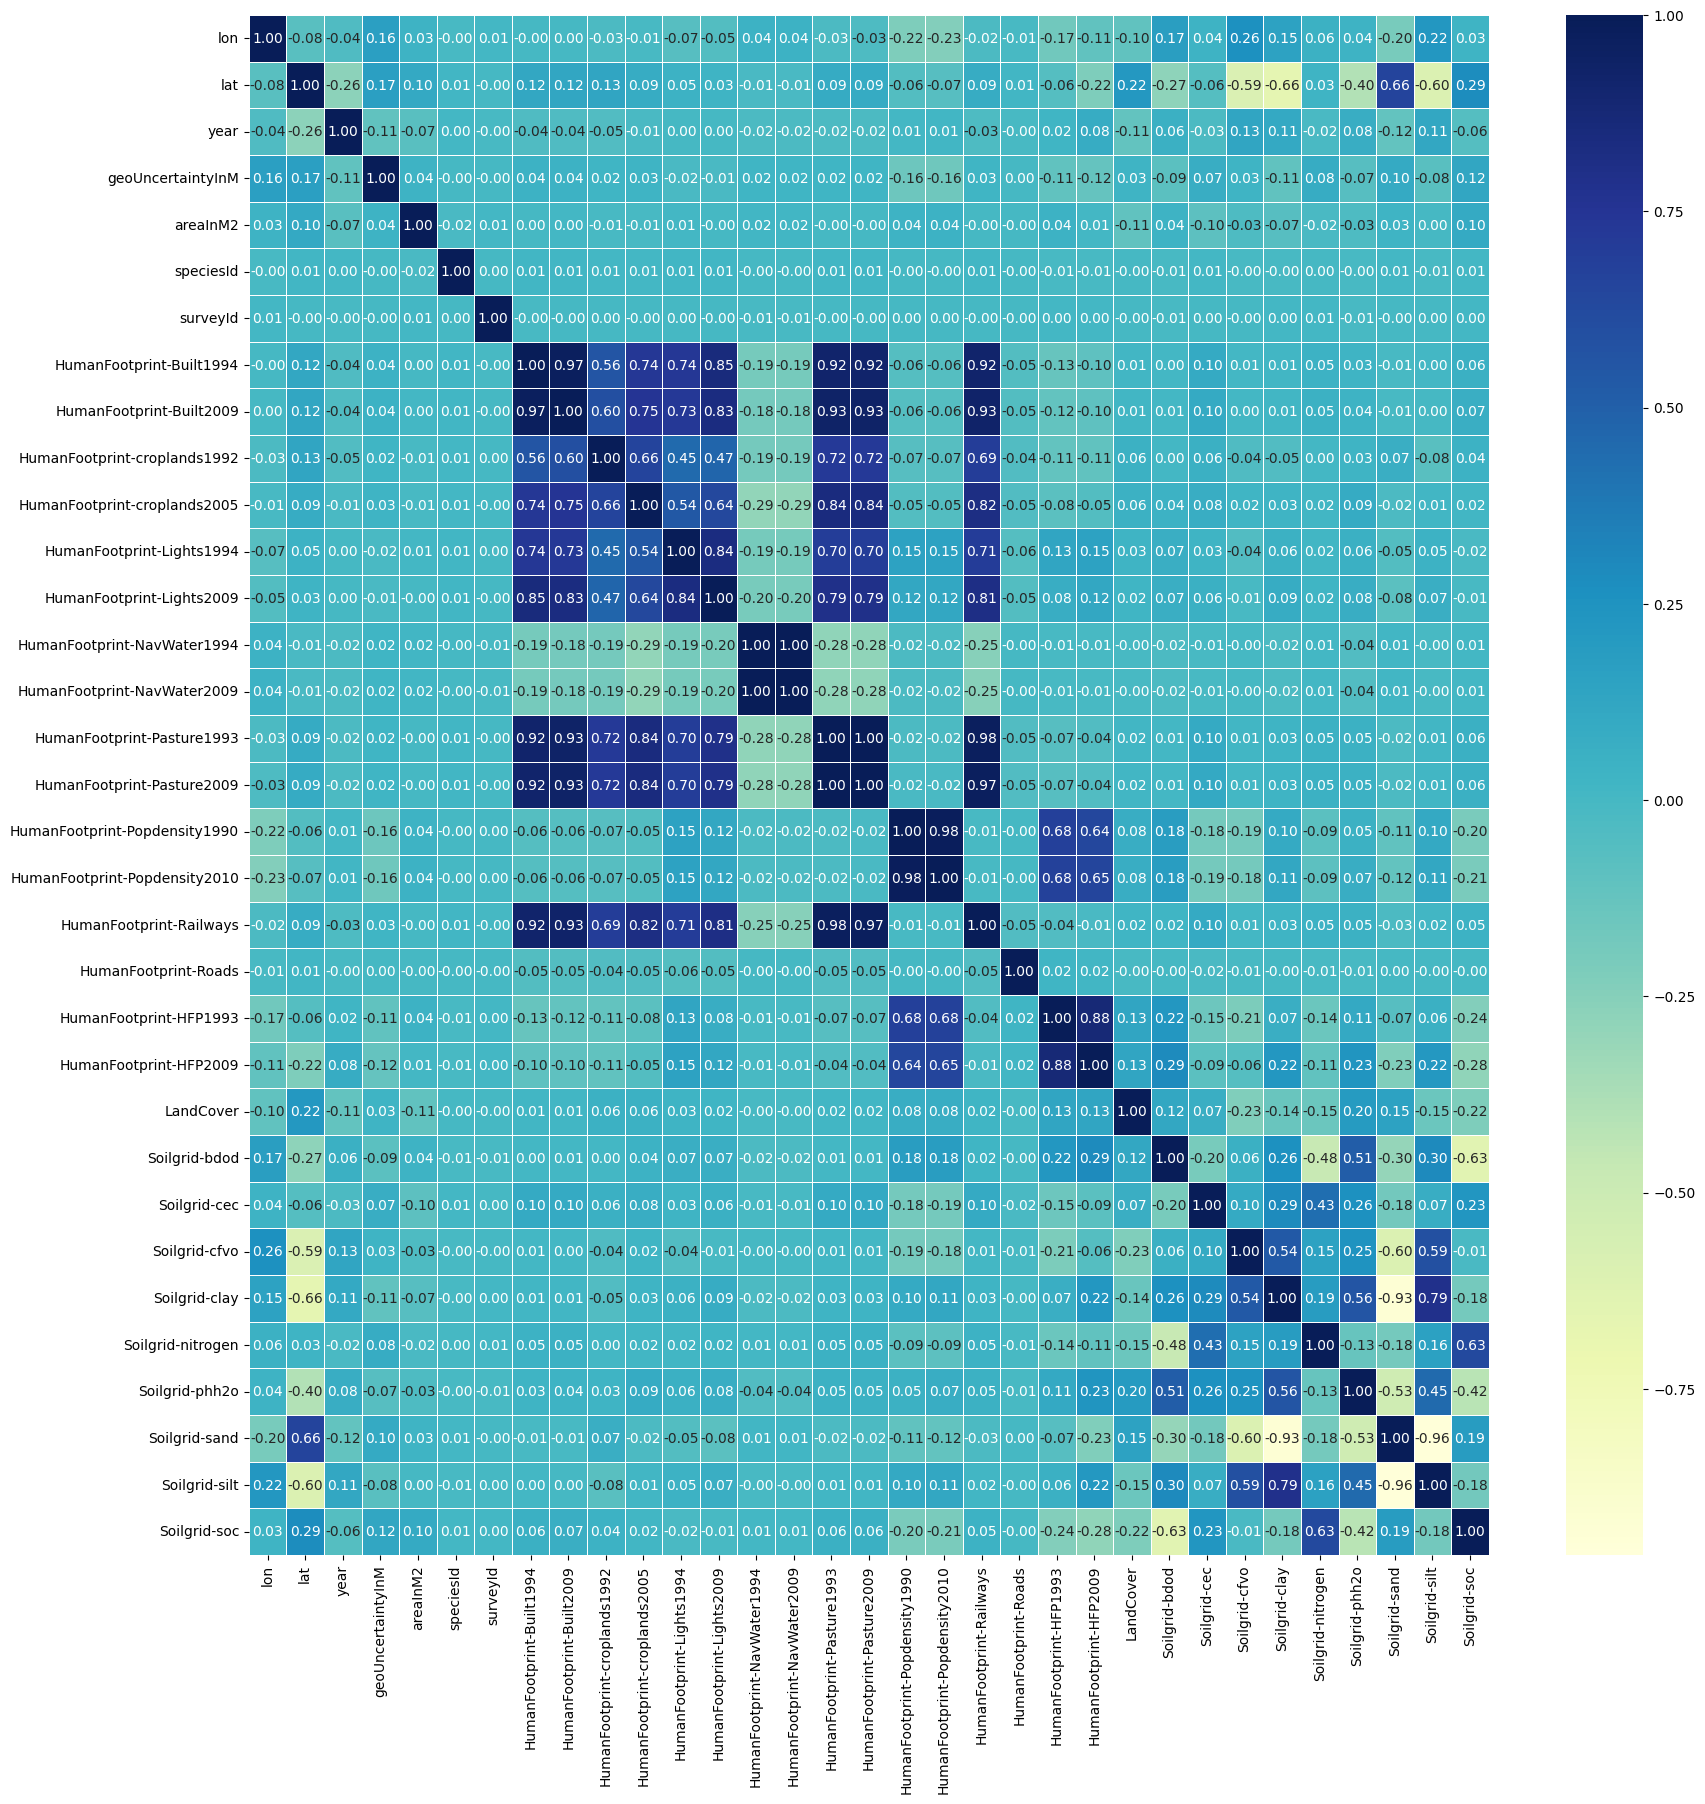

In [92]:
# Let's make our correlation matrix a little prettier
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
#bottom, top = ax.get_ylim()

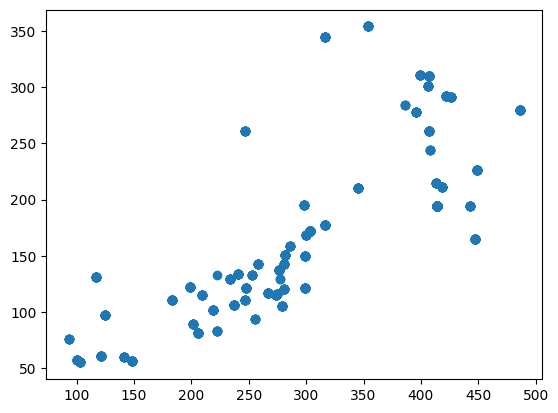

In [95]:
#Some visualization
plt.scatter(df_train['Soilgrid-silt'][:1000], df_train['Soilgrid-clay'][:1000])

## Creating a map using lan and lon co-ordinates

In [96]:
data_coord = df_test.loc[:, ["lon", "lat"]].copy()

In [97]:
data_coord.head()

,lon,lat
0,10.033550,57.12081
1,7.333000,46.22997
2,1.843658,42.58006
3,11.720090,46.26149
4,9.361870,55.90245


<Axes: xlabel='lon', ylabel='lat'>

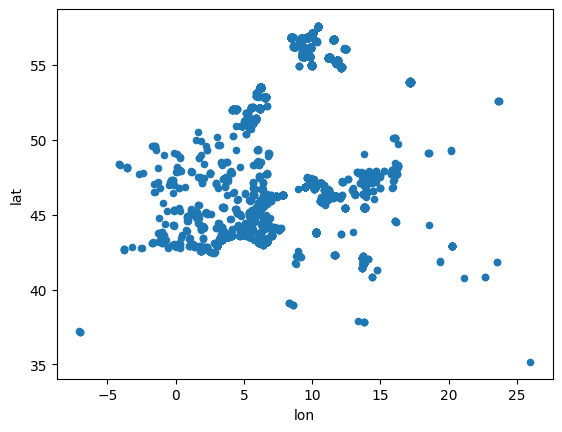

In [98]:
data_coord.plot.scatter('lon','lat')

As we can see the graph above lloks like Europe. So we can also represent the data on the background of Europe.

In [99]:
mean_lon = (min(df_train["lon"])+max(df_train["lon"]))/2

In [100]:
mean_lat = (min(df_train["lat"])+max(df_train["lat"]))/2

In [101]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

# Create the map
m_3 = folium.Map(location=[mean_lat,mean_lon], tiles='cartodbpositron', zoom_start=5)

# Add points to the map
mc = MarkerCluster()
for idx, row in data_coord.iterrows():
    if not math.isnan(row['lon']) and not math.isnan(row['lat']):
        mc.add_child(Marker([row['lat'], row['lon']]))
m_3.add_child(mc)


m_3

## Model Training

In [102]:
%%time

#Training the model
classifier = SGDClassifier( random_state=42)

multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)

multi_target_classifier.fit(X_train, y_train)

predictions = multi_target_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.0015
CPU times: total: 31.2 ms
Wall time: 1min 37s


In [103]:
%%time

#Training the model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)

multi_target_classifier.fit(X_train, y_train)

predictions = multi_target_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.002
CPU times: total: 1.19 s
Wall time: 15.3 s


In [104]:
%%time

#Training the model
classifier = LogisticRegression(random_state=42)

multi_target_classifier_lr = MultiOutputClassifier(classifier, n_jobs=-1)

multi_target_classifier_lr.fit(X_train, y_train)

predictions = multi_target_classifier_lr.predict(X_test)

# Evaluate accuracy

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.0165
CPU times: total: 15.6 ms
Wall time: 13.6 s


After runing several classification models, we found that the LogisticRegression is performing better than other models.
So we will go ahead with the LogisticRegression.

## Hyperparameter tuning

In [55]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: D

C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: D

C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: D

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [56]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0006951927961775605}

## Lets run the ideal model with best parameters

In [105]:
%%time
ideal_model = LogisticRegression(solver= 'liblinear', C= 0.0006951927961775605)

multi_target_classifier = MultiOutputClassifier(ideal_model, n_jobs=-1)

multi_target_classifier.fit(X_train, y_train)

predictions = multi_target_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.0155
CPU times: total: 0 ns
Wall time: 1min 4s


- After running the model on best parameters it turns out that, somehow model is performing well on default LogisticRegression settings(Accuracy : 0.016 and time : 11.6 s) for 10K samples.
- So we will fit final the test data on this model rather than ideal_model(Accuracy : 0.0155 and time : 1min 6s).
- Now we will run the model with the complete training set.

In [109]:
# Training the model on the complete dataset 
df_train = df_train.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X[:500000], y[:500000], test_size=0.2, random_state=42)


In [110]:
%%time

#Training the model
classifier = LogisticRegression(random_state=42)

multi_target_classifier_lr = MultiOutputClassifier(classifier, n_jobs=-1)

multi_target_classifier_lr.fit(X_train, y_train)

predictions = multi_target_classifier_lr.predict(X_test)

# Evaluate accuracy

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1e-05
CPU times: total: 156 ms
Wall time: 1h 43min 56s


In [86]:
X_train.shape

(933845, 32)

In [108]:
X_train.dtypes

lon                              float32
lat                              float32
year                             float32
geoUncertaintyInM                float32
areaInM2                         float32
surveyId                         float32
HumanFootprint-Built1994         float32
HumanFootprint-Built2009         float32
HumanFootprint-croplands1992     float32
HumanFootprint-croplands2005     float32
HumanFootprint-Lights1994        float32
HumanFootprint-Lights2009        float32
HumanFootprint-NavWater1994      float32
HumanFootprint-NavWater2009      float32
HumanFootprint-Pasture1993       float32
HumanFootprint-Pasture2009       float32
HumanFootprint-Popdensity1990    float32
HumanFootprint-Popdensity2010    float32
HumanFootprint-Railways          float32
HumanFootprint-Roads             float32
HumanFootprint-HFP1993           float32
HumanFootprint-HFP2009           float32
LandCover                        float32
Soilgrid-bdod                    float32
Soilgrid-cec    

In [88]:
c

In [90]:
X_train.dtypes

lon                              float32
lat                              float32
year                             float32
geoUncertaintyInM                float32
areaInM2                         float32
surveyId                         float32
HumanFootprint-Built1994         float32
HumanFootprint-Built2009         float32
HumanFootprint-croplands1992     float32
HumanFootprint-croplands2005     float32
HumanFootprint-Lights1994        float32
HumanFootprint-Lights2009        float32
HumanFootprint-NavWater1994      float32
HumanFootprint-NavWater2009      float32
HumanFootprint-Pasture1993       float32
HumanFootprint-Pasture2009       float32
HumanFootprint-Popdensity1990    float32
HumanFootprint-Popdensity2010    float32
HumanFootprint-Railways          float32
HumanFootprint-Roads             float32
HumanFootprint-HFP1993           float32
HumanFootprint-HFP2009           float32
LandCover                        float32
Soilgrid-bdod                    float32
Soilgrid-cec    

In [111]:
submission = pd.read_csv("GLC24_SAMPLE_SUBMISSION.csv")

In [115]:
submission.shape

(4716, 2)

In [125]:
submission["prediction"]= multi_target_classifier_lr.predict(df_test)

ValueError: Length of values (4025) does not match length of index (4716)

In [156]:
df_test.shape

(4716, 32)

In [157]:
scaler = StandardScaler()
df_test = scaler.fit_transform(df_test)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [177]:
df_test[np.isinf(df_test)]


,lon,lat,year,geoUncertaintyInM,areaInM2,surveyId,HumanFootprint-Built1994,HumanFootprint-Built2009,HumanFootprint-croplands1992,HumanFootprint-croplands2005,...,LandCover,Soilgrid-bdod,Soilgrid-cec,Soilgrid-cfvo,Soilgrid-clay,Soilgrid-nitrogen,Soilgrid-phh2o,Soilgrid-sand,Soilgrid-silt,Soilgrid-soc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-inf,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4712,NaN,NaN,NaN,NaN,-inf,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df_test.isna().sum()

lon                              0
lat                              0
year                             0
geoUncertaintyInM                0
areaInM2                         0
surveyId                         0
HumanFootprint-Built1994         0
HumanFootprint-Built2009         0
HumanFootprint-croplands1992     0
HumanFootprint-croplands2005     0
HumanFootprint-Lights1994        0
HumanFootprint-Lights2009        0
HumanFootprint-NavWater1994      0
HumanFootprint-NavWater2009      0
HumanFootprint-Pasture1993       0
HumanFootprint-Pasture2009       0
HumanFootprint-Popdensity1990    0
HumanFootprint-Popdensity2010    0
HumanFootprint-Railways          0
HumanFootprint-Roads             0
HumanFootprint-HFP1993           0
HumanFootprint-HFP2009           0
LandCover                        0
Soilgrid-bdod                    0
Soilgrid-cec                     0
Soilgrid-cfvo                    0
Soilgrid-clay                    0
Soilgrid-nitrogen                0
Soilgrid-phh2o      

In [45]:
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [52]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(fill_value= 4)
df_test_imputed = imp.fit_transform(df_test)

In [72]:
df_test_imputed = pd.DataFrame(df_test_imputed)

In [79]:
df_test_imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,10.033550,57.12081,2019.0,10.00000,707.000000,642.0,10.0,0.0,0.0,0.0,...,9.0,114.0,229.0,96.0,95.0,389.0,48.0,634.0,270.0,891.0
1,7.333000,46.22997,2019.0,7.16207,10.000000,1792.0,10.0,10.0,0.0,0.0,...,10.0,126.0,204.0,156.0,238.0,259.0,68.0,349.0,411.0,311.0
2,1.843658,42.58006,2018.0,0.00000,106.530239,3256.0,0.0,0.0,0.0,7.0,...,10.0,109.0,246.0,193.0,210.0,547.0,59.0,370.0,419.0,717.0
3,11.720090,46.26149,2021.0,10.00000,35.000000,3855.0,0.0,0.0,0.0,7.0,...,10.0,112.0,252.0,195.0,189.0,489.0,60.0,375.0,435.0,571.0
4,9.361870,55.90245,2017.0,10.00000,79.000000,4889.0,0.0,0.0,7.0,0.0,...,5.0,113.0,146.0,86.0,96.0,220.0,53.0,751.0,153.0,421.0


In [64]:
sg_test[np.isinf(sg_test)]
sg_test.isna().sum()

surveyId               0
Soilgrid-bdod        579
Soilgrid-cec         568
Soilgrid-cfvo        568
Soilgrid-clay        568
Soilgrid-nitrogen    568
Soilgrid-phh2o       568
Soilgrid-sand        568
Soilgrid-silt        568
Soilgrid-soc           0
dtype: int64

In [60]:
sg_test["Soilgrid-soc"].fillna(sg_test["Soilgrid-soc"].mean(),inplace = True)

In [63]:
sg_test[np.isinf(sg_test)]

,surveyId,Soilgrid-bdod,Soilgrid-cec,Soilgrid-cfvo,Soilgrid-clay,Soilgrid-nitrogen,Soilgrid-phh2o,Soilgrid-sand,Soilgrid-silt,Soilgrid-soc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
print(sg_test.isnull().sum())

surveyId               0
Soilgrid-bdod        579
Soilgrid-cec         568
Soilgrid-cfvo        568
Soilgrid-clay        568
Soilgrid-nitrogen    568
Soilgrid-phh2o       568
Soilgrid-sand        568
Soilgrid-silt        568
Soilgrid-soc           0
dtype: int64
